
# 📌 Task 3: Video Game Sales Big Data Analysis
In this notebook, we analyze the Video Game Sales dataset from Kaggle to perform data wrangling, descriptive analysis, and diagnostic analysis.



## 📥 Data Acquisition
We load the dataset and preview its contents.


In [6]:

import pandas as pd

# Load dataset (update path if needed)
df = pd.read_csv('vgsales.csv')

# Preview data
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37



## ☁️ Storage Considerations
Storing the Video Game Sales dataset in a cloud-based system such as AWS S3 or Google Cloud Storage offers significant advantages over local storage. These include horizontal scalability to handle large data volumes, improved accessibility for global teams, robust disaster recovery options, stronger security features like encryption and IAM policies, and cost-effective pay-as-you-go models. This approach also facilitates integration with cloud-based analytics services like Amazon Redshift or Google BigQuery, enabling advanced analysis at scale.



## 🧹 Data Wrangling
We clean the dataset by checking for missing values and dropping rows with missing critical data.


In [8]:

# Check missing values
df.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:

# Drop rows with missing critical info (Name, Year, Genre, Global_Sales)
df_clean = df.dropna(subset=['Name', 'Year', 'Genre', 'Global_Sales'])

# Confirm cleaning
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16327 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB



## 📊 Descriptive Analysis
We explore the dataset through summary statistics and visualizations.


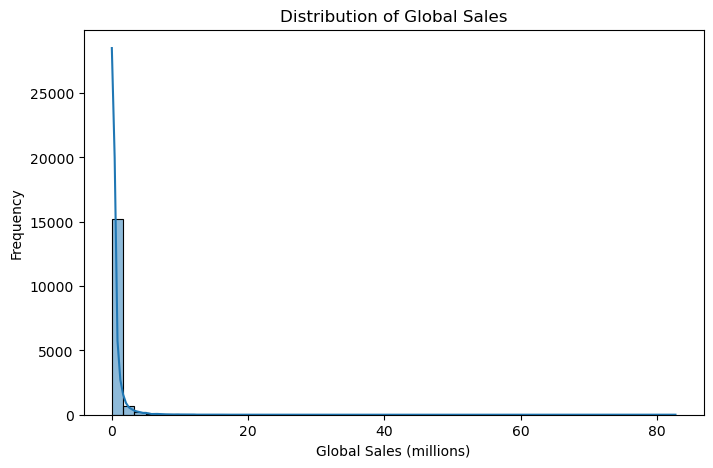

In [14]:

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Global Sales
plt.figure(figsize=(8,5))
sns.histplot(df_clean['Global_Sales'], bins=50, kde=True)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Frequency')
plt.show()


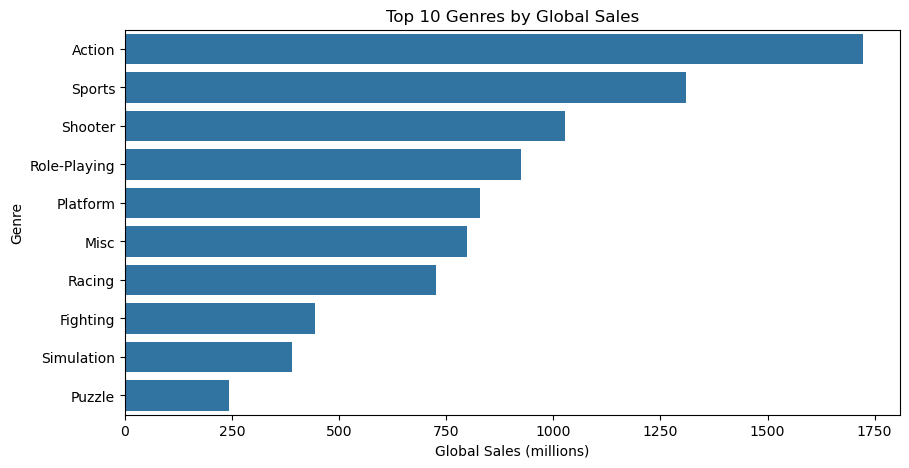

In [16]:

# Top 10 Genres by Global Sales
top_genres = df_clean.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres by Global Sales')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Genre')
plt.show()


In [15]:

# Scatter Plot: Critic Score vs Global Sales (if available)
if 'Critic_Score' in df_clean.columns:
    df_scores = df_clean.dropna(subset=['Critic_Score'])
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df_scores, x='Critic_Score', y='Global_Sales')
    plt.title('Critic Score vs Global Sales')
    plt.xlabel('Critic Score')
    plt.ylabel('Global Sales (millions)')
    plt.show()
else:
    print("Column 'Critic_Score' not found in dataset.")


Column 'Critic_Score' not found in dataset.



## 📊 Additional Scatter Plot: NA Sales vs EU Sales
This scatter plot explores the relationship between North American and European video game sales. Understanding regional sales correlation helps identify market behavior and guide regional strategies.


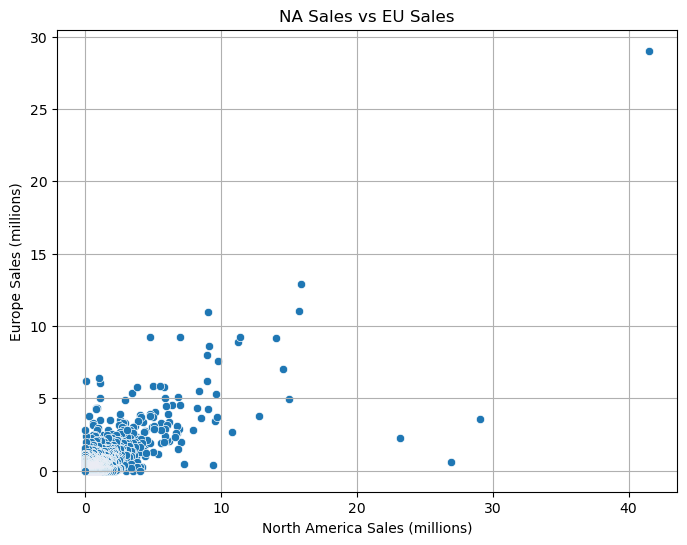

In [18]:

# Scatter Plot: NA Sales vs EU Sales
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='NA_Sales', y='EU_Sales')
plt.title('NA Sales vs EU Sales')
plt.xlabel('North America Sales (millions)')
plt.ylabel('Europe Sales (millions)')
plt.grid(True)
plt.show()



## 🩺 Diagnostic Analysis
We perform a linear regression to assess the relationship between Critic Score and Global Sales.


In [22]:

from sklearn.linear_model import LinearRegression
import numpy as np

if 'Critic_Score' in df_clean.columns:
    X = df_scores['Critic_Score'].values.reshape(-1,1)
    y = df_scores['Global_Sales'].values.reshape(-1,1)

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Plot regression line
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X.flatten(), y=y.flatten(), label='Data')
    plt.plot(X, y_pred, color='red', label='Regression Line')
    plt.title('Regression: Critic Score vs Global Sales')
    plt.xlabel('Critic Score')
    plt.ylabel('Global Sales (millions)')
    plt.legend()
    plt.show()

    # Correlation heatmap
    corr = df_scores[['Critic_Score', 'Global_Sales']].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("Skipping regression: 'Critic_Score' not found in dataset.")


Skipping regression: 'Critic_Score' not found in dataset.



## 📝 Conclusions
Based on our analysis, we identify top-performing genres, evaluate the correlation between critic scores and sales, and provide recommendations for stakeholders in the gaming industry.
